In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [6]:
games = pd.read_csv('database/games.csv')
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


<Axes: >

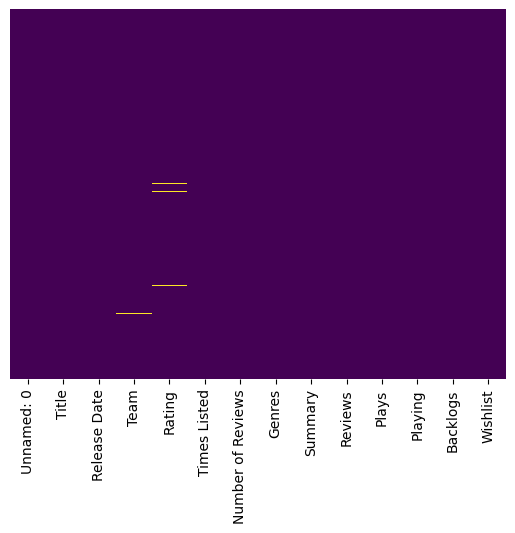

In [7]:
sns.heatmap(games.isnull(), yticklabels=False, cbar=False, cmap= 'viridis')
#yellows depict null values

In [8]:
print(games.isnull().sum())

# Check percentage of missing values
missing_percentage = (games.isnull().sum() / len(games)) * 100
print(missing_percentage)

Unnamed: 0            0
Title                 0
Release Date          0
Team                  1
Rating               13
Times Listed          0
Number of Reviews     0
Genres                0
Summary               1
Reviews               0
Plays                 0
Playing               0
Backlogs              0
Wishlist              0
dtype: int64
Unnamed: 0           0.000000
Title                0.000000
Release Date         0.000000
Team                 0.066138
Rating               0.859788
Times Listed         0.000000
Number of Reviews    0.000000
Genres               0.000000
Summary              0.066138
Reviews              0.000000
Plays                0.000000
Playing              0.000000
Backlogs             0.000000
Wishlist             0.000000
dtype: float64


In [9]:
games.dropna(inplace=True, axis=0)
games

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1507,Back to the Future: The Game,"Dec 22, 2010",['Telltale Games'],3.2,94,94,"['Adventure', 'Point-and-Click']",Back to the Future: The Game is one of Telltal...,['Very enjoyable game. The story adds onto the...,763,5,223,67
1508,1508,Team Sonic Racing,"May 21, 2019","['Sumo Digital', 'Sega']",2.9,264,264,"['Arcade', 'Racing']",Team Sonic Racing combines the best elements o...,"['jogo morto mas bom', 'not my cup of tea', ""C...",1.5K,49,413,107
1509,1509,Dragon's Dogma,"May 22, 2012",['Capcom'],3.7,210,210,"['Brawler', 'RPG']","Set in a huge open world, Dragon’s Dogma: Dark...","['Underrated.', 'A grandes rasgos, es como un ...",1.1K,45,487,206
1510,1510,Baldur's Gate 3,"Oct 06, 2020",['Larian Studios'],4.1,165,165,"['Adventure', 'RPG', 'Strategy', 'Tactical', '...","An ancient evil has returned to Baldur's Gate,...",['Bu türe bu oyunla girmeye çalışmak hataydı s...,269,79,388,602


In [23]:
games[games.duplicated()]

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist


In [11]:
def decode(column):
    column = column.str.decode("unicode_escape")\
    .str.replace(r'[^a-zA-Z1-9\ ]', '', regex=True).str.strip()
    return column

In [12]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatize(txt):
    doc = nlp(txt)
    tokens = [token for token in doc if not token.is_punct]
    lemmas = [token.lemma_ if token.pos_ != 'PRON' else token.orth_ for token in tokens]
    return lemmas

In [13]:
games.loc[:, "Summary"] = decode(games['Summary'])

In [14]:
games.reset_index(inplace=True, drop= True)

In [15]:
tfidf = TfidfVectorizer(stop_words="english", tokenizer=lemmatize)

In [17]:
tfidf2 = tfidf.fit_transform(games['Summary'])
tfidf.get_feature_names_out()

array([' ', '                          ', '                           ',
       ..., 'zoom', 'zur', 'zx'], dtype=object)

In [18]:
cos_simm = cosine_similarity(tfidf2, tfidf2)
cos_simm

array([[1.        , 0.        , 0.03551173, ..., 0.02793236, 0.        ,
        0.03155652],
       [0.        , 1.        , 0.03377156, ..., 0.03163894, 0.        ,
        0.        ],
       [0.03551173, 0.03377156, 1.        , ..., 0.05614652, 0.02982844,
        0.05012323],
       ...,
       [0.02793236, 0.03163894, 0.05614652, ..., 1.        , 0.        ,
        0.00950606],
       [0.        , 0.        , 0.02982844, ..., 0.        , 1.        ,
        0.01802466],
       [0.03155652, 0.        , 0.05012323, ..., 0.00950606, 0.01802466,
        1.        ]])

In [42]:
name = 'adventure'
games[games["Title"].str.contains(name, regex=True,case=False)].drop_duplicates()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
250,250,Kirby's Adventure,"Mar 23, 1993","['HAL Laboratory', 'Nintendo']",3.6,718,718,['Platform'],Not everything is well in Dream Land For some ...,['Very fun game. This is where it feels the Ki...,6K,61,690,217
313,313,Zelda II: The Adventure of Link,"Jan 14, 1987","['Nintendo', 'Nintendo EAD']",2.6,756,756,"['Adventure', 'RPG']",Zelda II The Adventure of Link is the second m...,['Another massive adventure that is often look...,4.5K,55,1.1K,290
537,537,Kirby's Adventure,"Mar 23, 1993","['HAL Laboratory', 'Nintendo']",3.6,718,718,['Platform'],Not everything is well in Dream Land For some ...,['Very fun game. This is where it feels the Ki...,6K,61,690,217
618,619,Moon: Remix RPG Adventure,"Oct 16, 1997","['ASCII Entertainment', 'Love-de-Lic']",4.4,572,572,"['Adventure', 'Puzzle', 'RPG']",In this antiRPG adventure game notable for par...,"[""While you're waiting for the night, you can ...",663,100,1.3K,1K
1015,1022,Sonic Adventure 2,"Jun 23, 2001","['Sega', 'Sonic Team USA']",3.6,842,842,"['Adventure', 'Platform']",Sonic Adventure 2 is the sequel to Sonic Adven...,"[""The period leading up to\n ...",5.1K,89,1K,342
1040,1047,Sonic Adventure 2: Battle,"Dec 20, 2001","['Sonic Team', 'Sega']",3.7,742,742,"['Adventure', 'Platform']",Sonic Adventure 2 Battle is a complete convers...,['Recomendado (pero ten en cuenta que hay much...,6.8K,78,771,248
1116,1123,The Great Ace Attorney: Adventures,"Jul 09, 2015",['Capcom'],4.1,385,385,"['Adventure', 'Point-and-Click', 'Puzzle', 'Vi...",The Great Ace Attorney Adventures is the ninth...,"['Very mixed on this game.', 'pray forgive the...",1.6K,141,838,586
1126,1134,JoJo’s Bizarre Adventure: All-Star Battle R,"Sep 01, 2022","['Bandai Namco Entertainment', 'CyberConnect2']",3.4,122,122,"['Adventure', 'Fighting']",A remaster of the fighting game JoJos Bizarre ...,"[""I really can't get over how good this game i...",796,71,191,372
1346,1360,Sonic Rush Adventure,"Sep 14, 2007","['Nintendo', 'Sonic Team']",3.5,278,278,['Platform'],Sonic returns to the DS with all the classic 2...,['La La... La La... La La...\n ...,1.9K,22,389,208
1393,1407,JoJo's Bizarre Adventure: Eyes of Heaven,"Dec 17, 2015","['CyberConnect2', 'Bandai Namco Entertainment']",2.8,106,106,"['Arcade', 'Fighting']",JoJos Bizarre Adventure Eyes of Heaven is an u...,"['Meh asf', 'I mean its kinda fun, like the fa...",1.7K,36,276,196


In [43]:
index = games[games["Title"].str.contains(name, regex=True,case=False)].drop_duplicates().index[0]

In [49]:
similarity = pd.DataFrame(cos_simm[index], columns=['score'])

game = similarity.sort_values('score', ascending=False)[1:6].index

games['Title'].iloc[game]

250      Kirby's Adventure
1017    Kirby's Dream Land
946         Rayman Legends
517      Luigi's Mansion 3
1023     Luigi's Mansion 3
Name: Title, dtype: object